##Iris Flower Classification Project

##Done By: Ashwath Bala S

Table of Contents:

1.Problem Statement

2.Data Dictionary

3.Loading the Required Libraries

4.Importing the Dataset

5.Exploratory Data Analysis

6.Model Building

7.Model Comparison


##1. Problem Statement

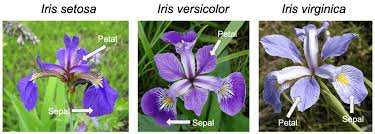

The main objective of this project is to develop machine learning model to classify iris flowers into one of the three species: Iris setosa, Iris versicolor, and Iris virginica, based on the features given in the dataset

##2. Data Dictionary

Let's check the data files! According to the data description we should find the following columns:

Id: A unique identifier for each sample in the dataset.

SepalLengthCm: The length of the sepal of the iris flower in centimeters.

SepalWidthCm: The width of the sepal of the iris flower in centimeters.

PetalLengthCm: The length of the petal of the iris flower in centimeters.

PetalWidthCm: The width of the petal of the iris flower in centimeters.

Species: The species of the iris flower. This is the target variable and can be one of the three species: 'setosa', 'versicolor', or 'virginica'. (Target Variable)

##3. Loading the Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

##4.Importing the Dataset

In [ ]:
iris=pd.read_csv("Iris_Classification_Project.csv")

In [ ]:
#Loading top few rows

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##5.Exploratory Data Analysis

Now, anyways we won't be needing the ID column and thus let's drop it

In [ ]:
iris.drop("Id", axis=1, inplace = True)

Now, Let's check for Null Values

In [ ]:
# Check for null values
null_values = iris.isnull().sum()

# Display null values (if any)
print("Null values in each column:")
print(null_values)

Null values in each column:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In this Dataset, we don't have any null values

Now, Let's look for any Outliers

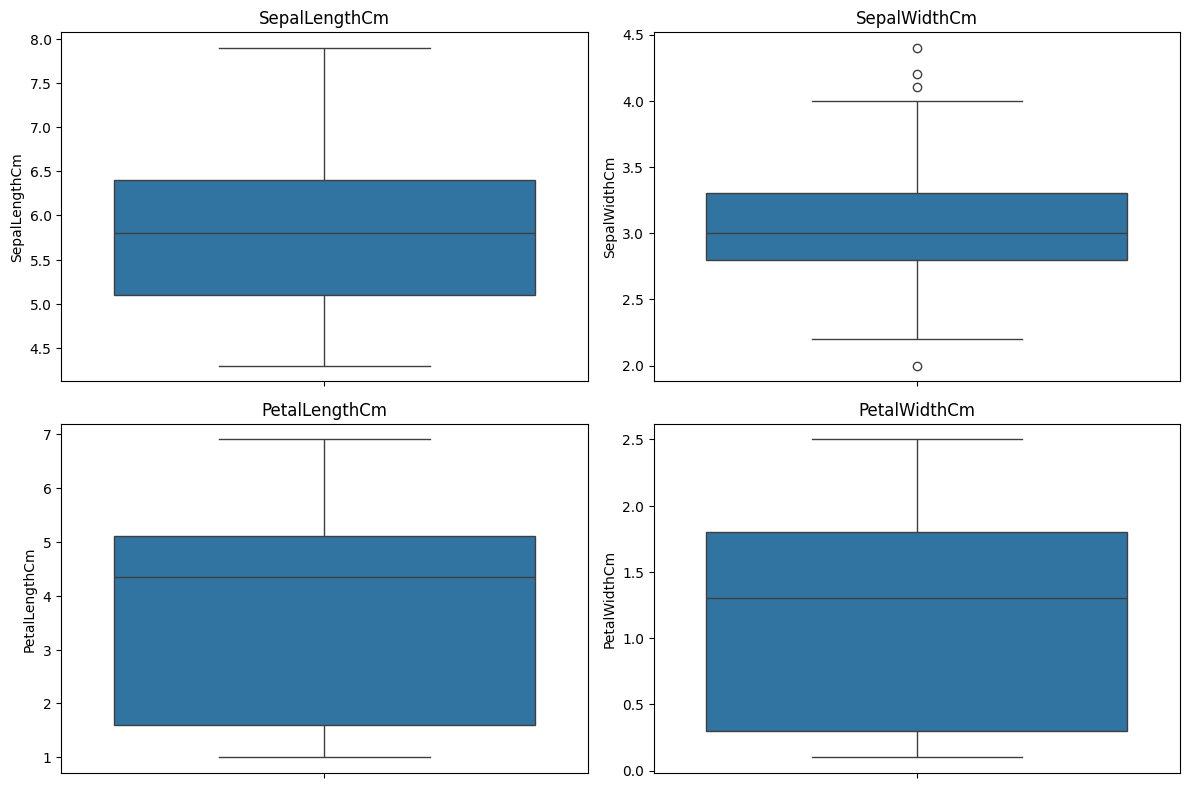

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plots for each numerical feature
for i, column in enumerate(iris.select_dtypes(include=['int', 'float'])):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=iris, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

We can Observe that SepalWidth has some Outliers

Building a Machine Learning Model with Outliers is not advisalble.
So, let's do remove those outliers before building our Machine Learning Model

In [ ]:
# Calculating Q1, Q3, and IQR for 'SepalWidthCm' column
Q1_SepalWidthCm = iris['SepalWidthCm'].quantile(0.25)
Q3_SepalWidthCm = iris['SepalWidthCm'].quantile(0.75)
IQR_SepalWidthCm = Q3_SepalWidthCm - Q1_SepalWidthCm

# Defining the outlier threshold for 'SepalWidthCm' column
threshold = 1.5

# Identifying outliers using the IQR method for 'SepalWidthCm' column
outliers_SepalWidthCm = iris[(iris['SepalWidthCm'] < (Q1_SepalWidthCm - threshold * IQR_SepalWidthCm)) | (iris['SepalWidthCm'] > (Q3_SepalWidthCm + threshold * IQR_SepalWidthCm))]

# Removing outliers from the DataFrame
iris = iris.drop(outliers_SepalWidthCm.index, axis=0)

Let's Analyse the Speal Length with respect to the Sepal Width

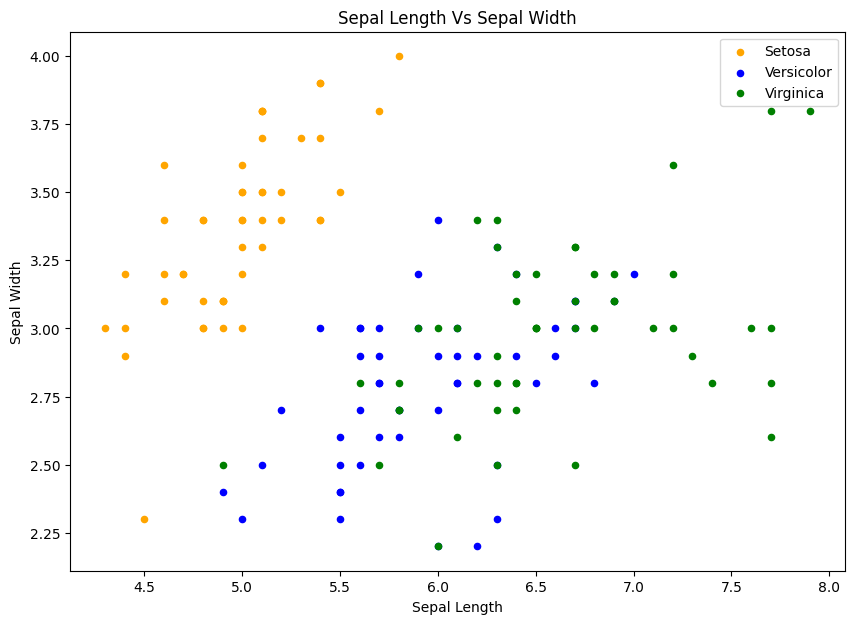

In [ ]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Sepal Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

Now, Let's Plot for Petal Length vs Petal Width

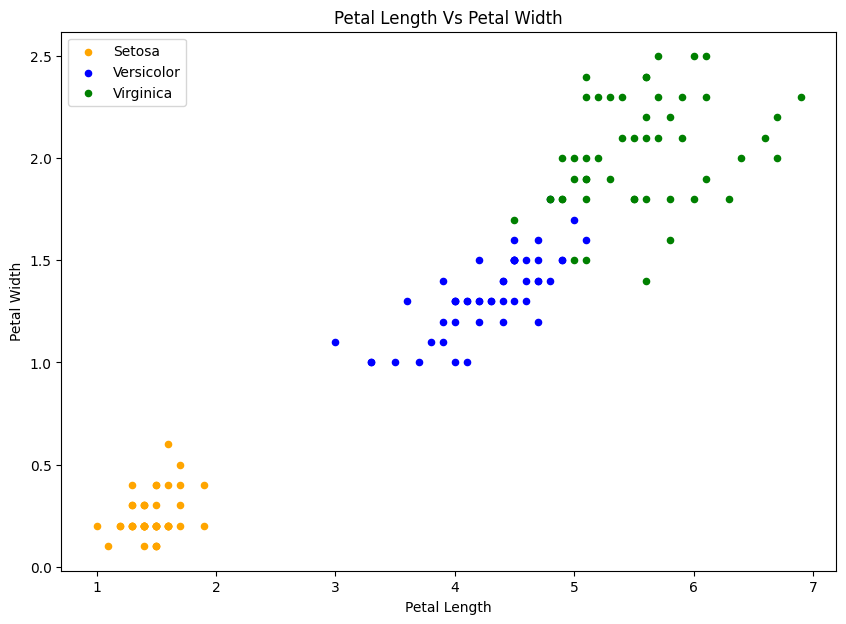

In [ ]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Petal Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

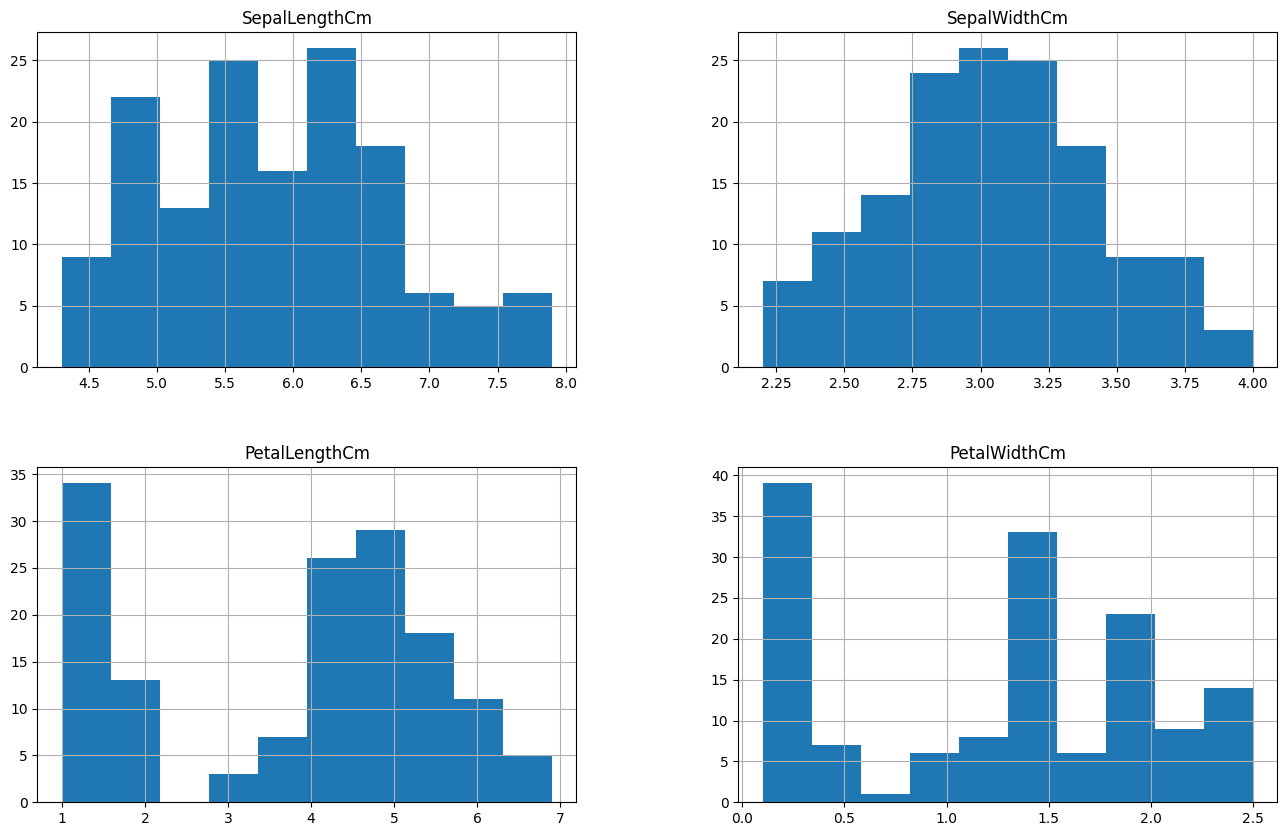

In [ ]:
# Creating histograms for each numeric feature in the iris DataFrame
iris.hist()

# Getting the current figure object
fig = plt.gcf()

# Adjusting the size of the figure
fig.set_size_inches(16, 10)

# Displaying the figure with the histograms
plt.show()

Now Let's Use a Violin Plot - Combines elements of a box plot and a kernel density plot to display the distribution of a continuous variable across different categories, allowing for easy comparison of distributions, detection of multimodality, and identification of central tendencies and variability within each category.

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

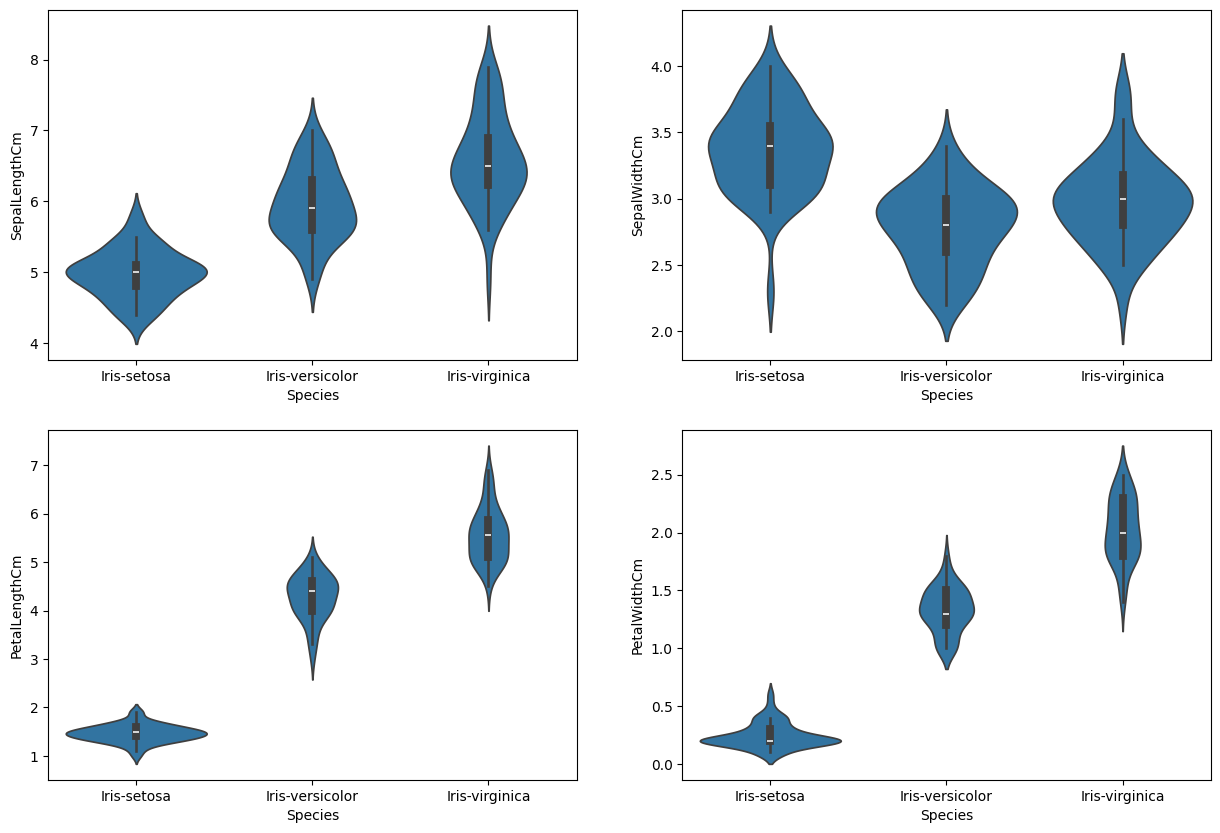

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

KDE Plot - Represents the probability density function of a continuous variable, providing insights into data distribution, identifying modes

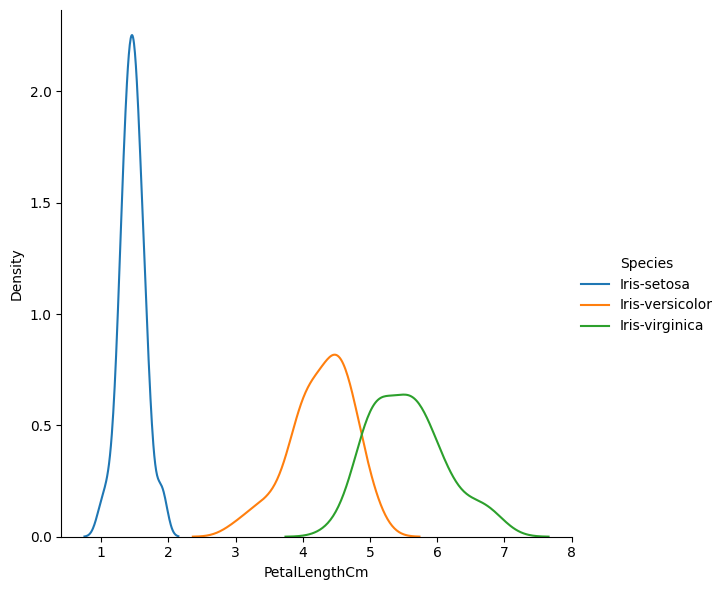

In [ ]:
sns.FacetGrid(iris, hue="Species", height=6).map(sns.kdeplot, "PetalLengthCm").add_legend()

PairPlot - Generates a matrix of scatterplots for all pairs of numerical features, aiding in visualizing relationships, identifying patterns, diagnosing multicollinearity

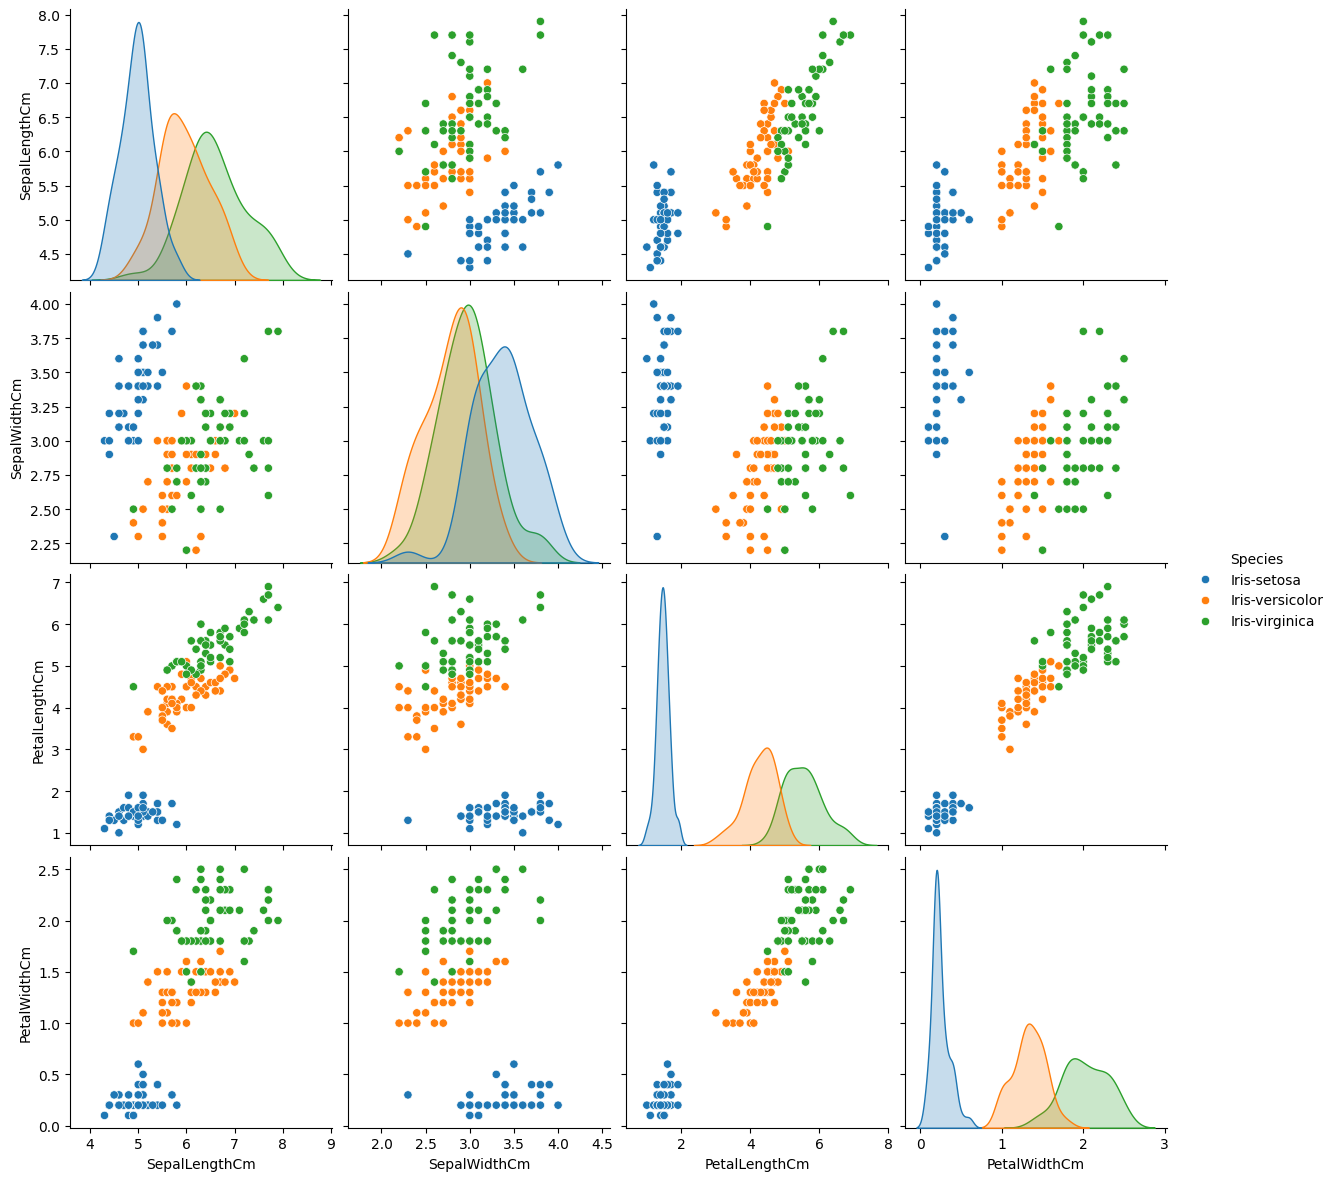

In [ ]:
sns.pairplot(iris, hue="Species", size=3)

Now, Let's Plot a Correlation Heatmap - Represents the magnitude of a relationship between two variables in a tabular format using colors, aiding in identifying patterns, correlations, and trends within a dataset

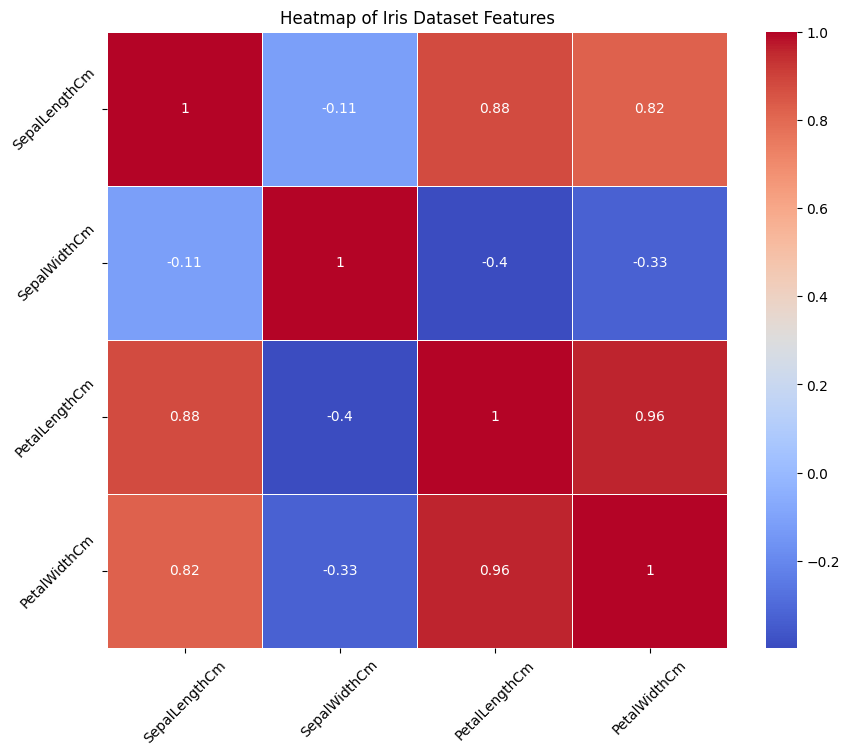

In [ ]:
# Getting the Numeric Features
numeric_cols = iris.select_dtypes(include=['float64', 'int64']).columns
iris_numeric = iris[numeric_cols]

# Calculating the correlation matrix
corr_matrix = iris_numeric.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding title and labels
plt.title('Heatmap of Iris Dataset Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

Here, We can Observe that SepalWidth (With -0.11) has more negative correlation, when compared to other variables

##6.Model Building

Splitting Up Data into Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

# Seperating the data into dependent and independent variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creating a logistic regression model without regularization
log_reg = LogisticRegression(penalty='none', random_state=0)

# Training the logistic regression model on the entire training data
log_reg.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = log_reg.predict(X_test)

# Getting the summary of the predictions made by the classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Performing cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)

# Printing the cross-validation scores
print("\nCross-validation scores:", cv_scores)

# Calculating the mean cross-validation score
mean_cv_score_log_reg = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score_log_reg)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]

Accuracy: 1.0

Cross-validation scores: [0.95833333 0.95652174 1.         0.95652174 1.        ]
Mean cross-validation score: 0.9742753623188406


Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Training the Decision Tree classifier on the entire training data
dt_classifier.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred_dt = dt_classifier.predict(X_test)

# Getting the summary of the predictions made by the classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nAccuracy:", accuracy_dt)

# Performing cross-validation
cv_scores_dt = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Printing the cross-validation scores
print("\nCross-validation scores:", cv_scores_dt)

# Calculating the mean cross-validation score
mean_cv_score_dt = cv_scores_dt.mean()
print("Mean cross-validation score:", mean_cv_score_dt)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.95      0.93      0.93        30


Confusion Matrix:
[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]

Accuracy: 0.9333333333333333

Cross-validation scores: [0.91666667 0.91304348 1.         0.95652174 0.91304348]
Mean cross-validation score: 0.939855072463768


Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Creating an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=0)

# Training the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Getting the summary of the predictions made by the classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy_svm)

# Performing cross-validation
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Printing the cross-validation scores
print("\nCross-validation scores:", cv_scores)

# Calculating the mean cross-validation score
mean_cv_score_svm = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score_svm)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]

Accuracy: 1.0

Cross-validation scores: [1.         0.95652174 1.         0.95652174 0.95652174]
Mean cross-validation score: 0.9739130434782608


k-Nearest Neighbors (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating a kNN classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Training the kNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = knn_classifier.predict(X_test)

# Accuracy score
accuracy_knn = accuracy_score(y_test, y_pred)

# Getting the summary of the predictions made by the classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print("\nAccuracy:", accuracy_knn)

# Performing cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)

# Printing the cross-validation scores
print("\nCross-validation scores:", cv_scores)

# Calculating the mean cross-validation score
mean_cv_score_knn = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score_knn)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]

Accuracy: 1.0

Cross-validation scores: [0.95833333 0.86956522 1.         0.95652174 0.95652174]
Mean cross-validation score: 0.9481884057971014


Gaussian Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Creating a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Training the classifier on the training data
classifier.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = classifier.predict(X_test)

# Calculating accuracy score
accuracy_gnb = accuracy_score(y_test, y_pred)

# Getting the summary of the predictions made by the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('Accuracy:', accuracy_gnb)

# Performing cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Printing the cross-validation scores
print("\nCross-validation scores:", cv_scores)

# Calculating the mean cross-validation score
mean_cv_score_gnb = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score_gnb)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
Accuracy: 0.9666666666666667

Cross-validation scores: [0.91666667 0.91304348 1.         0.95652174 0.95652174]
Mean cross-validation score: 0.9485507246376811


Multinomial Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Creating a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Training the classifier on the training data
classifier.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = classifier.predict(X_test)

# Calculating accuracy score
accuracy_mnb = accuracy_score(y_test, y_pred)

# Getting the summary of the predictions made by the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('Accuracy:', accuracy_mnb)

# Performing cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Printing the cross-validation scores
print("\nCross-validation scores:", cv_scores)

# Calculating the mean cross-validation score
mean_cv_score_mnb = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score_mnb)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
Accuracy: 0.9666666666666667

Cross-validation scores: [0.95833333 0.73913043 0.95652174 0.86956522 0.95652174]
Mean cross-validation score: 0.8960144927536232


Bernoulli Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Creating a Bernoulli Naive Bayes classifier
classifier = BernoulliNB()

# Training the classifier on the training data
classifier.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = classifier.predict(X_test)

# Calculating accuracy score
accuracy_bnb = accuracy_score(y_test, y_pred)

# Getting the summary of the predictions made by the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('Accuracy:', accuracy_bnb)

# Performing cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Printing the cross-validation scores
print("\nCross-validation scores:", cv_scores)

# Calculating the mean cross-validation score
mean_cv_score_bnb = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score_bnb)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
Iris-versicolor       0.00      0.00      0.00        10
 Iris-virginica       0.30      1.00      0.46         9

       accuracy                           0.30        30
      macro avg       0.10      0.33      0.15        30
   weighted avg       0.09      0.30      0.14        30

Confusion Matrix:
[[ 0  0 11]
 [ 0  0 10]
 [ 0  0  9]]
Accuracy: 0.3

Cross-validation scores: [0.375      0.34782609 0.34782609 0.34782609 0.34782609]
Mean cross-validation score: 0.3532608695652174


Complement Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import ComplementNB

# Creating a Complement Naive Bayes classifier
classifier = ComplementNB()

# Training the classifier on the training data
classifier.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = classifier.predict(X_test)

# Calculating accuracy score
accuracy_cnb = accuracy_score(y_test, y_pred)

# Getting the summary of the predictions made by the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('Accuracy:', accuracy_cnb)

# Performing cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Printing the cross-validation scores
print("\nCross-validation scores:", cv_scores)

# Calculating the mean cross-validation score
mean_cv_score_cnb = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score_cnb)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.00      0.00      0.00        10
 Iris-virginica       0.47      1.00      0.64         9

       accuracy                           0.67        30
      macro avg       0.49      0.67      0.55        30
   weighted avg       0.51      0.67      0.56        30

Confusion Matrix:
[[11  0  0]
 [ 0  0 10]
 [ 0  0  9]]
Accuracy: 0.6666666666666666

Cross-validation scores: [0.66666667 0.65217391 0.65217391 0.65217391 0.69565217]
Mean cross-validation score: 0.663768115942029


##7. Model Comparison

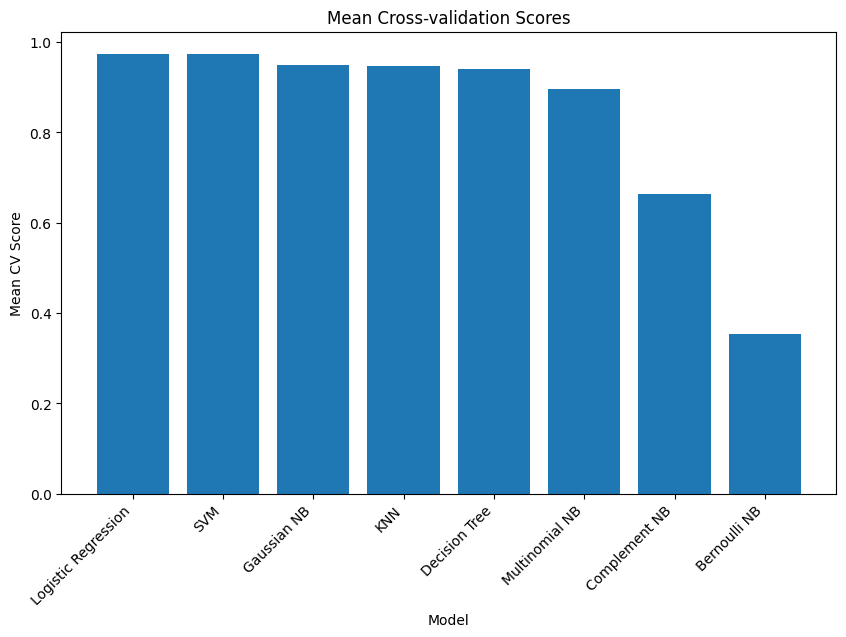

In [ ]:
# Getting a list of models and their mean cross-validation scores
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 'Gaussian NB', 'Multinomial NB', 'Bernoulli NB', 'Complement NB']
mean_cv_scores = [mean_cv_score_log_reg, mean_cv_score_dt, mean_cv_score_svm, mean_cv_score_knn, mean_cv_score_gnb, mean_cv_score_mnb, mean_cv_score_bnb, mean_cv_score_cnb]

# Zipping the list
model_cv_scores = list(zip(models, mean_cv_scores))

# Sorting the zipped list based on mean CV scores in descending order
sorted_model_cv_scores = sorted(model_cv_scores, key=lambda x: x[1], reverse=True)

# Unzipping the sorted list
sorted_models, sorted_mean_cv_scores = zip(*sorted_model_cv_scores)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_models, sorted_mean_cv_scores)
plt.title('Mean Cross-validation Scores')
plt.xlabel('Model')
plt.ylabel('Mean CV Score')

plt.xticks(rotation=45, ha='right')
plt.show()

In this Project, we can see that Logistic Regression Model is performing better when compared to other models

##In this Project, we have built Machine Learning Models to classify the Iris Flower Type, based on the given features given in the dataset